In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

В архиве собраны данные о туристическом трафике абонентов МФ в некоторые
небольшие города РФ.
Задача: нужно определить, в каких городах нам наиболее уместно развивать сеть
(устанавливать новые БС или оптимизировать работу существующих).
Набор данных ограничен. Но на основе его исследования нужно сгенерировать гипотезы и
подкрепить данными.

Переменные:
Column_1 - лишнее, не анализировать
Snap_date - дата начала месяца туризма
Id_hash - id абонента. Один абонент может встречаться несколько раз в разных месяцах
или городах
days - продолжительность присутствия в днях в точке туризма
home_region - номер домашнего региона
city - точка туризма
gender - предсказанный моделью пол абонента
age - предсказанный моделью возраст абонента в годах
mou - голосовой трафик абонента за месяц (snap_date) в минутах
mou_out - исходящий голосовой трафик абонента за месяц в минутах
dou - интернет-трфик абонента за месяц, МБ
Interests - список интересов абонента за месяц snap_date
top_service - url, по которому у абонента больше всего трафика за месяц
volume_sum - трафик абонента за время присутствия в точке туризма, МБ
dl/ul_volume_sum - разложение volume_sum на uplink, downlink, МБ

In [2]:
data = pd.read_csv('D:/data/test_case1/DA_кейс/Данные_2021/Tourists_Абинск_2021.csv', sep=',')

data

,Unnamed: 0,snap_date,id_hash,days,home_region,tourists_region,city,gender,age,mou,mou_out,dou
0,0,2021.07.01,61fc25d86364a6a5d6e85319bcf7aef5,3,77,23,Абинск,1,47,33.512500,NaN,8.053427
1,1,2021.07.01,c42fc8d3ad95a2e006567967814463a3,15,61,23,Абинск,2,28,1738.257600,1029.315000,46874.117000
2,2,2021.07.01,ce99dc79821948d73c0d2ab2d9eee25d,5,34,23,Абинск,1,36,326.655000,173.512500,31097.098000
3,3,2021.07.01,02db2c7539fb8a552f48b42e3096151f,11,72,23,Абинск,2,34,165.549990,39.917496,2390.938200
4,4,2021.07.01,d3fd4dd683cf977fabbf8804d4006dfe,1,7,23,Абинск,2,33,1355.112500,469.910000,600.361100
...,...,...,...,...,...,...,...,...,...,...,...,...
55043,55043,2021.12.01,483bd8549e39af74c3104ae3e7ea3afa,1,46,23,Абинск,1,33,250.092500,95.095000,18045.334000
55044,55044,2021.12.01,767acc39d873b28e7d4da771b88546a0,12,61,23,Абинск,2,48,9.135000,NaN,NaN
55045,55045,2021.12.01,767acc39d873b28e7d4da771b88546a0,12,61,23,Абинск,2,48,9.135000,NaN,NaN
55046,55046,2021.12.01,c1f6ee796f3b7ab96501d34947d3bf4e,7,71,23,Абинск,1,25,15.819999,4.357500,47604.055000


In [3]:
def read_csv_files_into_dataframe(folder_path):
    # Получаем список всех файлов в указанной папке
    file_list = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

    # Создаем пустой DataFrame
    combined_df = pd.DataFrame()

    # Читаем каждый CSV файл и добавляем его в единый DataFrame
    for file in file_list:
        df = pd.read_csv(file)
        combined_df = pd.concat([combined_df, df], ignore_index=True)

    return combined_df

# Пример использования функции
folder_path = "D:/data/test_case1/DA_кейс/Данные_2021/"
combined_dataframe = read_csv_files_into_dataframe(folder_path)

# Выводим общее количество строк и столбцов в объединенном датасете
print("Total Rows:", len(combined_dataframe))
print("Total Columns:", len(combined_dataframe.columns))



Total Rows: 3884691
Total Columns: 12


In [4]:
combined_dataframe.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
combined_dataframe

,snap_date,id_hash,days,home_region,tourists_region,city,gender,age,mou,mou_out,dou
0,2021.07.01,61fc25d86364a6a5d6e85319bcf7aef5,3,77,23,Абинск,1,47,33.512500,NaN,8.053427
1,2021.07.01,c42fc8d3ad95a2e006567967814463a3,15,61,23,Абинск,2,28,1738.257600,1029.315000,46874.117000
2,2021.07.01,ce99dc79821948d73c0d2ab2d9eee25d,5,34,23,Абинск,1,36,326.655000,173.512500,31097.098000
3,2021.07.01,02db2c7539fb8a552f48b42e3096151f,11,72,23,Абинск,2,34,165.549990,39.917496,2390.938200
4,2021.07.01,d3fd4dd683cf977fabbf8804d4006dfe,1,7,23,Абинск,2,33,1355.112500,469.910000,600.361100
...,...,...,...,...,...,...,...,...,...,...,...
3884686,2021.12.01,25dccf5be32c74bec32fd15045edff7d,8,37,33,Юрьев-Польский,1,23,70.857506,35.577500,6271.548300
3884687,2021.12.01,ea926a74baad3680d371beca8d981c11,15,37,33,Юрьев-Польский,1,37,328.912500,85.295006,41689.750000
3884688,2021.12.01,ea926a74baad3680d371beca8d981c11,15,37,33,Юрьев-Польский,1,37,328.912500,85.295006,41689.750000
3884689,2021.12.01,c73a6b4d10fbd4cdab000c29b538793d,2,61,33,Юрьев-Польский,3,0,964.459960,462.315000,444.645260


In [6]:
# Список группируемых столбцов
group_columns_list = [['days', 'city', 'age', 'gender'],
                      ['city', 'age', 'gender'],
                      ['city']]

# Итерация по различным комбинациям группируемых столбцов
for group_cols in group_columns_list:
    combined_dataframe['mou'] = combined_dataframe.groupby(group_cols)['mou'].transform(lambda x: x.fillna(x.median()))
    combined_dataframe['mou_out'] = combined_dataframe.groupby(group_cols)['mou_out'].transform(lambda x: x.fillna(x.median()))
    combined_dataframe['dou'] = combined_dataframe.groupby(group_cols)['dou'].transform(lambda x: x.fillna(x.median()))


C:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarnin

In [7]:
combined_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3884691 entries, 0 to 3884690
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   snap_date        object 
 1   id_hash          object 
 2   days             int64  
 3   home_region      int64  
 4   tourists_region  int64  
 5   city             object 
 6   gender           int64  
 7   age              int64  
 8   mou              float64
 9   mou_out          float64
 10  dou              float64
dtypes: float64(3), int64(5), object(3)
memory usage: 326.0+ MB


In [8]:
combined_dataframe.columns

Index(['snap_date', 'id_hash', 'days', 'home_region', 'tourists_region',
       'city', 'gender', 'age', 'mou', 'mou_out', 'dou'],
      dtype='object')

In [9]:
combined_dataframe.columns

Index(['snap_date', 'id_hash', 'days', 'home_region', 'tourists_region',
       'city', 'gender', 'age', 'mou', 'mou_out', 'dou'],
      dtype='object')

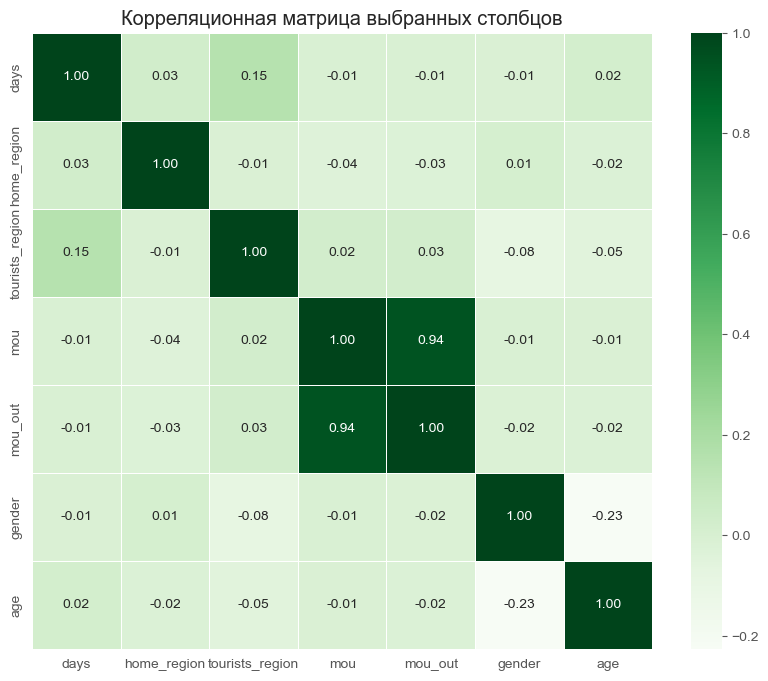

In [10]:
selected_columns = ['days', 'home_region', 'tourists_region', 'mou', 'mou_out', 'gender', 'age']


# Создание подмножества датафрейма только с выбранными столбцами
selected_dataframe = combined_dataframe[selected_columns]

# Вычисление корреляционной матрицы для подмножества столбцов
corr_matrix_df = selected_dataframe.corr()

# Построение тепловой карты
plt.style.use('ggplot')
plt.figure(figsize=(10, 8))  # Регулирование размера фигуры
sns.heatmap(corr_matrix_df, annot=True, cmap="Greens", fmt=".2f", linewidths=.5)
plt.title('Корреляционная матрица выбранных столбцов')
plt.show()

In [1]:
for column in combined_dataframe.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(combined_dataframe[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

NameError: name 'combined_dataframe' is not defined

In [16]:
from pyspark.sql import SparkSession
import os

def read_csv_files_into_dataframe(folder_path):
    # Создаем SparkSession
    spark = SparkSession.builder \
        .appName("Read CSV Files") \
        .getOrCreate()

    # Получаем список всех файлов в указанной папке
    file_list = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

    # Создаем пустой DataFrame
    combined_df = None

    # Читаем каждый CSV файл и добавляем его в единый DataFrame
    for file in file_list:
        df = spark.read.format("csv").option("header", "true").load(file, inferSchema=True)
        if combined_df is None:
            combined_df = df
        else:
            combined_df = combined_df.union(df)

    # Останавливаем SparkSession
    spark.stop()

    return combined_df

# Пример использования функции
folder_path = "D:/data/test_case1/DA_кейс/Данные_2021/"
combined_dataframe = read_csv_files_into_dataframe(folder_path)

# Выводим общее количество строк и столбцов в объединенном датасете
print("Total Rows:", combined_dataframe.count())
print("Total Columns:", len(combined_dataframe.columns))


Py4JJavaError: An error occurred while calling o485.count.
: java.lang.IllegalStateException: Cannot call methods on a stopped SparkContext.
This stopped SparkContext was created at:

org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
java.base/jdk.internal.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
java.base/jdk.internal.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:62)
java.base/jdk.internal.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
java.base/java.lang.reflect.Constructor.newInstance(Constructor.java:490)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
py4j.Gateway.invoke(Gateway.java:238)
py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
py4j.ClientServerConnection.run(ClientServerConnection.java:106)
java.base/java.lang.Thread.run(Thread.java:834)

The currently active SparkContext was created at:

(No active SparkContext.)
         
	at org.apache.spark.SparkContext.assertNotStopped(SparkContext.scala:122)
	at org.apache.spark.SparkContext.defaultParallelism(SparkContext.scala:2707)
	at org.apache.spark.sql.execution.adaptive.CoalesceShufflePartitions.$anonfun$apply$1(CoalesceShufflePartitions.scala:60)
	at scala.runtime.java8.JFunction0$mcI$sp.apply(JFunction0$mcI$sp.java:23)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.execution.adaptive.CoalesceShufflePartitions.apply(CoalesceShufflePartitions.scala:57)
	at org.apache.spark.sql.execution.adaptive.CoalesceShufflePartitions.apply(CoalesceShufflePartitions.scala:33)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$optimizeQueryStage$1(AdaptiveSparkPlanExec.scala:163)
	at scala.collection.LinearSeqOptimized.foldLeft(LinearSeqOptimized.scala:126)
	at scala.collection.LinearSeqOptimized.foldLeft$(LinearSeqOptimized.scala:122)
	at scala.collection.immutable.List.foldLeft(List.scala:91)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.optimizeQueryStage(AdaptiveSparkPlanExec.scala:162)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.newQueryStage(AdaptiveSparkPlanExec.scala:572)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.createQueryStages(AdaptiveSparkPlanExec.scala:522)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$createQueryStages$2(AdaptiveSparkPlanExec.scala:561)
	at scala.collection.TraversableLike.$anonfun$map$1(TraversableLike.scala:286)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1431)
	at scala.collection.IterableLike.foreach(IterableLike.scala:74)
	at scala.collection.IterableLike.foreach$(IterableLike.scala:73)
	at scala.collection.AbstractIterable.foreach(Iterable.scala:56)
	at scala.collection.TraversableLike.map(TraversableLike.scala:286)
	at scala.collection.TraversableLike.map$(TraversableLike.scala:279)
	at scala.collection.AbstractTraversable.map(Traversable.scala:108)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.createQueryStages(AdaptiveSparkPlanExec.scala:561)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$getFinalPhysicalPlan$1(AdaptiveSparkPlanExec.scala:261)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.getFinalPhysicalPlan(AdaptiveSparkPlanExec.scala:256)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.withFinalPlanUpdate(AdaptiveSparkPlanExec.scala:401)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.executeCollect(AdaptiveSparkPlanExec.scala:374)
	at org.apache.spark.sql.Dataset.$anonfun$count$1(Dataset.scala:3626)
	at org.apache.spark.sql.Dataset.$anonfun$count$1$adapted(Dataset.scala:3625)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4334)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4332)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4332)
	at org.apache.spark.sql.Dataset.count(Dataset.scala:3625)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:834)
